In [35]:

import numpy as np
import math
import matplotlib.pyplot as plt
from math import ceil
from scipy import linalg

In [42]:
def lowess(x,y,f,iterations):
    n = len(x)
    r = int(ceil(f*n))
    h = [np.sort(np.abs(x-x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None]-x[None, :])/h), 0.0, 1.0)
    w = (1-w**3)**3
    y_estimate = np.zeros(n)
    delta = np.ones(n)
    
    
    for iteration in range(iterations):
        for i in range(n):
            weight = delta * w[:, i]
            b = np.array([np.sum(weight*y),np.sum(weight*y* x)])
            A = np.array([[np.sum(weight),np.sum(weight*x)], [np.sum(weight* x),np.sum(weight*x*x)]])
            beta = linalg.solve(A,b)
            y_estimate[i] = beta[0]+beta[1]*x[i]
            
        red = y - y_estimate
        s = np.median(np.abs(red))
        delta = np.clip(red/(6.0*s), -1, 1)
        delta = (1- delta**2)**2
    return y_estimate
    

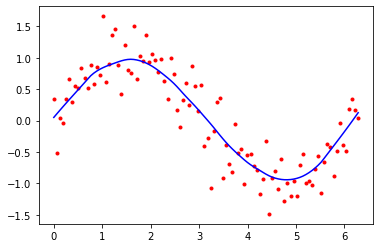

In [43]:
n = 100
x = np.linspace(0, 2*math.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)
f = .25
iterations = 3 
y_estimate = lowess(x,y,f,iterations)


plt.plot(x,y,'r.')
plt.plot(x,y_estimate,'b-')